# Ivey PhD Research Series

**Julian Barg, PhD Candidate**

## Oil Spills and Organizational Learning

![Oilspill x](img/oilspill_x.jpg)

![Oilspill y](img/oilspill_y.jpg)

![Oilspill z](img/oilspill_z.jpg)

![Oilspill 1](img/oilspill_1.png)

![Oilspill 2](img/oilspill_2.png)

![Oilspill 3](img/oilspill_3.png)

![Oilspill 4](img/oilspill_4.png)

![Oilspill 5](img/oilspill_5.png)

![Oilspill 6](img/oilspill_6.png)

![Oilspill 7](img/oilspill_7.png)

![Oilspill 8](img/oilspill_8.png)

![Oilspill 9](img/oilspill_9.png)

![Oilspill 10](img/oilspill_10.png)

### Comment: why do these images matter

* Engage
* Make abstract issue tangible
* Balance beauty and burden
    * E.g., *climate grief* (Cunsolo & Ellis 2018)

## Purpose

**Design philosophie of this presentation**

* PhD Colloqium-style presentation

* Halfway through literature review

* Based on my summer paper, but evolved

* Theory based rather than data based

* A moment of reflection

* A little bit of *what works?*

## Setup

In [1]:
library(tidyverse)
library(oildata)
options(repr.plot.width=7, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
head(pipelines)

year,ID,name,commodity,hca_offshore,hca_onshore,hca_total,total_onshore,total_offshore,total_miles,significant_incidents,serious_incidents
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008,31174,Shell Pipeline,crude,39,1269.00,1308.00,2354.00,1534,3888.00,4,0
2008,32129,Oklahoma Gas Processing,hvl,0,0.00,0.00,11.00,0,11.00,0,0
2008,31135,Petro-Diamond Terminal Company,non_hvl,0,2.00,2.00,2.00,0,2.00,0,0
2008,31082,Key Pipeline Limited,non_hvl,0,2.00,2.00,22.00,0,22.00,0,0
2008,Chevron (Group),Chevron Pipe Line,CO2 OR OTHER,0,2.57,2.57,129.04,0,129.04,0,0
2008,32178,Vintage Production California,crude,0,11.28,11.28,11.28,0,11.28,0,0


## Data

https://julianbarg.shinyapps.io/incident_dashboard/

* Oil spill data
* Oil spills are quite frequent
* The most demanding issue is data consolidations (M&As etc.)

## What is Organizational Learning?

### Origin

<img src="./img/wright_1936_fig_2.png" style="width: 600px;"/>

(Wright 1936)

### Classic model

<img src="./img/argote_epple_1990_fig_1.png" style="width: 600px;"/>

(Argote 1990)

### *And they called their discovery...*

**Definition of Organizational Learning**: "change in the organization’s knowledge that occurs as a function of experience" (Argote 2013, 31).

### Application to other ares

* Continuous product of chemicals (Lieberman 1984)
* Operating reliability of nuclear plants (Joskow and Rozanski 1979)
* Pizza production (Darr, Argote and Epple 1995)
* Surgery success rates (Reagans, Argote and Brooks 2005)

## Does the data show learning?

In [3]:
learning_data <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              incidents = sum(significant_incidents, na.rm = T), 
              incident_rate = incidents/miles)

head(learning_data)

year,miles,incidents,incident_rate
<dbl>,<dbl>,<dbl>,<dbl>
2004,151740.8,121,0.0007974124
2005,159142.8,124,0.0007791743
2006,159488.4,100,0.0006270047
2007,162668.2,103,0.0006331909
2008,164592.0,123,0.0007473023
2009,170883.7,105,0.0006144528


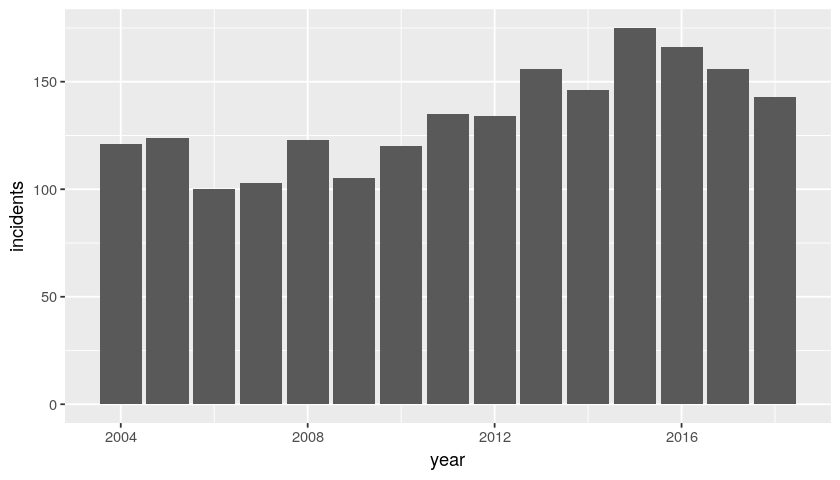

In [4]:
ggplot(learning_data, aes(x = year, y = incidents)) +
    geom_col()

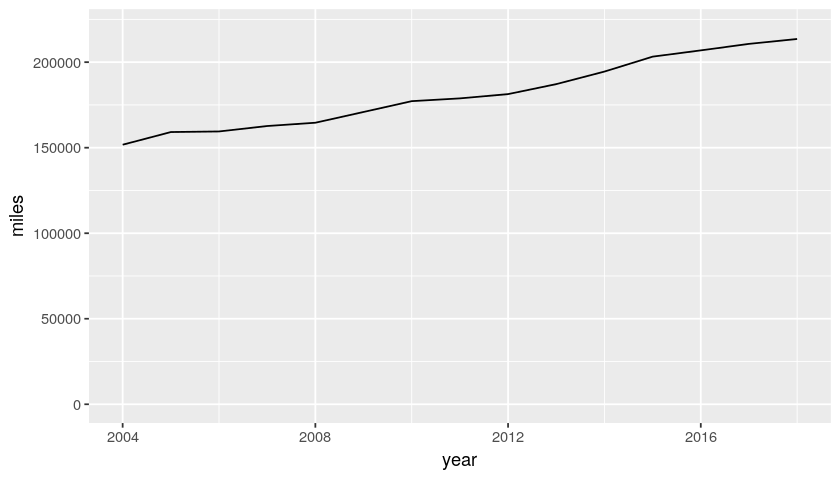

In [5]:
ggplot(learning_data, aes(x = year, y = miles)) +
    geom_line() + 
    scale_y_continuous(limits = c(0, 220000))

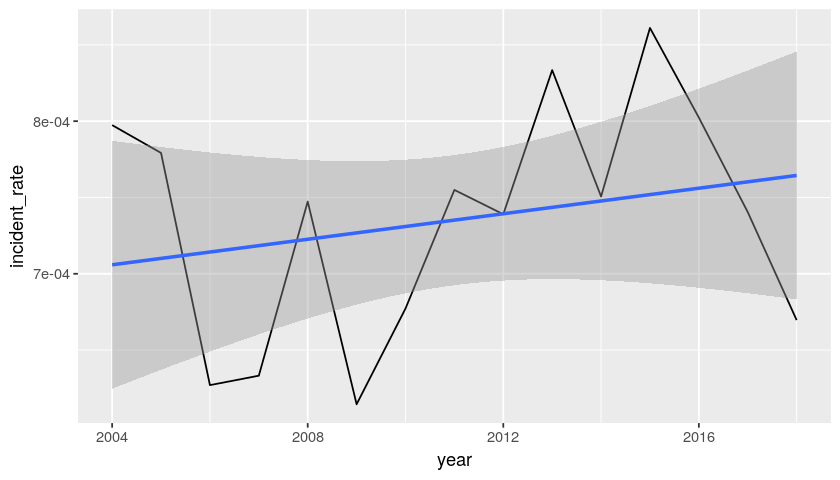

In [6]:
ggplot(learning_data, aes(x = year, y = incident_rate)) +
    geom_line() +
    geom_smooth(method="lm")

In [7]:
learning_by_commodity <- pipelines %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    group_by(year, commodity) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              incidents = sum(significant_incidents, na.rm = T), 
              incident_rate = incidents/miles)

head(learning_by_commodity)

year,commodity,miles,incidents,incident_rate
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2004,crude,47665.51,58,0.0012168128
2004,hvl,47068.51,20,0.0004249125
2004,non_hvl,57006.78,43,0.0007542963
2005,crude,45986.23,55,0.0011960103
2005,hvl,50421.94,25,0.0004958159
2005,non_hvl,62734.67,44,0.0007013665


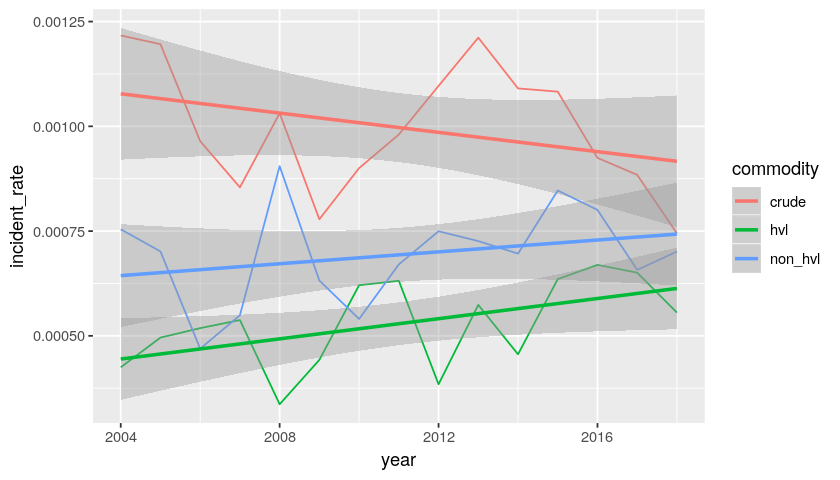

In [8]:
ggplot(learning_by_commodity, aes(x = year, y = incident_rate, color = commodity)) +
    geom_line() +
    geom_smooth(method="lm")

In [9]:
largest_companies <- pipelines %>%
    group_by(year, ID) %>%
    summarize(total_miles = sum(total_miles, na.rm = T)) %>%
    group_by(ID) %>%
    filter(total_miles == max(total_miles)) %>%
    ungroup() %>%
    top_n(6, total_miles)

largest_companies

year,ID,total_miles
<dbl>,<chr>,<dbl>
2005,Phillips 66 (Group),12000.00
2006,Kinder Morgan (Group),15200.32
2014,31618,23100.73
2017,Magellan (Group),12943.07
2018,Energy Transfer Partners (Group),14658.88
2018,ONEOK (Group),11792.19


In [10]:
learning_by_company <- pipelines %>%
    filter(ID %in% largest_companies$ID) %>%
    group_by(year, ID) %>%
    summarize(miles = sum(total_miles, na.rm = T), 
              incidents = sum(significant_incidents, na.rm = T), 
              incident_rate = incidents/miles) %>%
    ungroup() %>%
    mutate(name = add_company_names(ID))

head(learning_by_company)

year,ID,miles,incidents,incident_rate,name
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2004,31618,14687.00,7,0.0004766120,Enterprise Products Operating
2004,Kinder Morgan (Group),14913.00,16,0.0010728894,Kinder Morgan (Group)
2004,Magellan (Group),8538.00,2,0.0002342469,Magellan (Group)
2004,ONEOK (Group),175.00,0,0.0000000000,ONEOK (Group)
2004,Phillips 66 (Group),6494.00,5,0.0007699415,Phillips 66 (Group)
2005,31618,14567.54,12,0.0008237493,Enterprise Products Operating


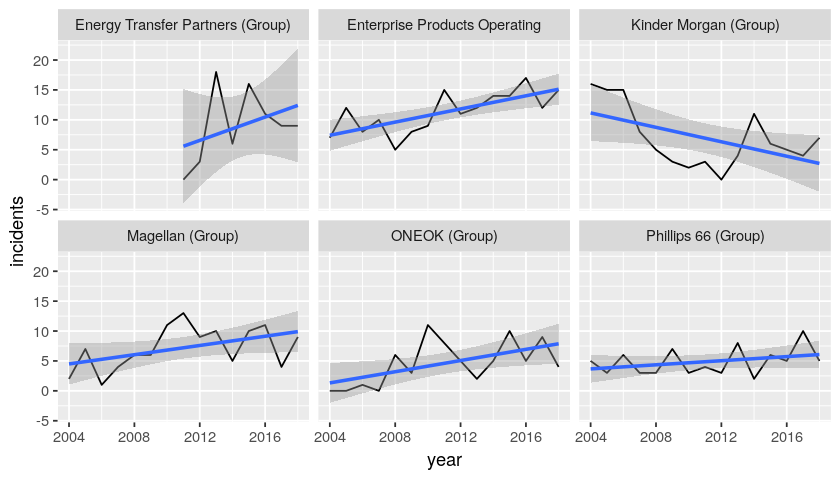

In [11]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = incidents)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

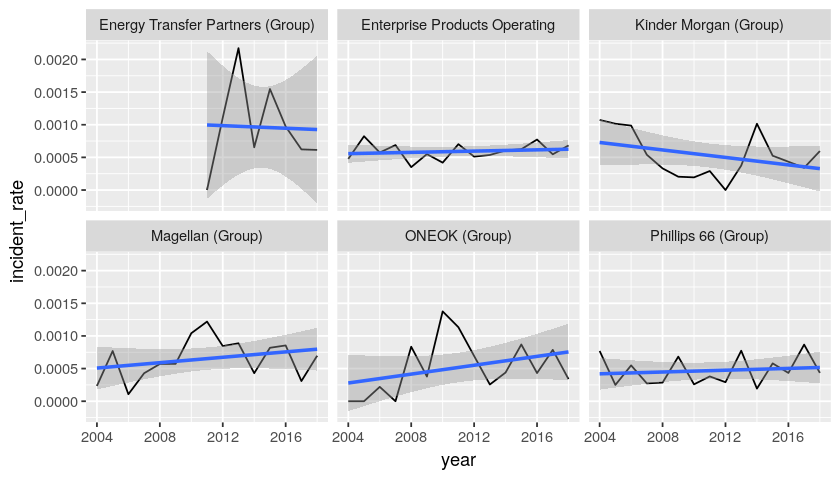

In [12]:
learning_by_company %>%
    filter(miles > 100) %>%
    ggplot(aes(x = year, y = incident_rate)) +
        facet_wrap(~ name) +
        geom_line() +
        geom_smooth(method="lm")

## Why doesn't my data show learning?

![Figure 1](img/fig/figure_1.PNG)

Figure 1. Based on Cyert and March (1963), Levinthal and March (1993).

![Figure 2](img/fig/figure_2.PNG)

Figure 2. Based on Cyert and March (1963), Levinthal and March (1993).

![Figure 3](img/fig/figure_3.PNG)

Figure 3. Based on Cyert and March (1963), Levinthal and March (1993); Tragedy of the Commons see Hardin (1968).

![Figure 4](img/fig/figure_4.PNG)

Figure 4. Based on Cyert and March (1963), Levinthal and March (1993).

### Learning from rare events

* Where feedback is infrequent, organizations can learn by experiencing history richly (March, Sproull & Tamuz 1991).

* Despite feedback being sparse, pipeline operators might learn through this channel.

* Companies can survive even extreme spills, so the problem of motivation is still not resolved.

* (Of course, this is consistent with what we have observed in the data.)

### Learning from rare events: limitation

* Failures (rare events) get reinterpreted as success (Perrow 1984).

* https://www.forbes.com/sites/brighammccown/2018/06/04/what-ever-happened-to-the-dakota-access-pipeline
    
    (**paraphrasing**) 
    
> *Spills do not happen. And even when they happen, we quickly get them under control. Therefore, pipelines are perfectly safe.*

![Figure 5](img/fig/figure_5.PNG)

Figure 5. Based on Cyert and March (1963), Perrow (1984).

### Aspirations

![Figure 6](img/fig/figure_6.PNG)

Figure 6. Based on Cyert and March (1963), Levinthal and March (1993).

![Figure 7](img/fig/figure_7.PNG)

Figure 7. Based on Cyert and March (1963), Levinthal and March (1993), Baum and Dahlin (2007).

---

If companies monitor environmental behavior, there might be a motivation for vicarious learning (Kim and Miner 2007).

## Population-level learning

#### Diverging epistemologies

https://www.forbes.com/sites/brighammccown/2018/06/04/what-ever-happened-to-the-dakota-access-pipeline

(Paraphrasing)

> *Pipelines are safe. Spills don't happen, and even if they do, we have that under control.*

**Vs.**

https://www.businessinsider.com/north-dakota-access-pipeline-protest-drinking-water-2016-10

(Paraphrasing)

> *Our water is pristine. We live in untouched nature, and drink the water from the source, no processing necessary. The pipeline can only diminish our water quality; over the long run, it will.*

#### The reality of living with a pipeline (or at least one of them)

https://www.theguardian.com/us-news/2020/jan/27/pennsylvania-residents-mariner-east-pipelines-drinking-water-contamination

Another project of Energy Transfer Partners. The project is plagued by problems, and undergoing a criminal investigation. The story illuminates the human dimension, from the perspective of a stakeholder that initially had a positive attitude toward pipelines.

https://marinerpipelinefacts.com/safety/pipeline-safety/

The website emphasizes that Energy Transfer Partners is adhering to all regulations. This is presented as something positive, even though it amounts to "*we are not doing anything illegal*" (and the lawsuits indicate that even that is not true), while avoiding to discuss the safety record in an empirical way. 

![Figure 8](img/fig/figure_8.PNG)

Figure 8. Based on Ryers et al. (2018).

![Figure 9](img/fig/figure_9.PNG)

Figure 9.

### Contents of learning - what knowledge is created

#### Rhetorics

https://www.aboutpipelines.com/en/cepa-integrity-first/

* Canadian industry initiative goal of zero incidents

***

#### Reality

https://youtu.be/cR2kpkYkk8s

* The actual goal is mitigating impacts

#### Two technologies: prevention and mitigation

* To some extent, industry-wide event of mitigating effects of spills
* *Decoupling* of spills. "We have the technology to controll spills"
* Prevention-based approach would require taking each spill extremely serious (rather than dismissing spill based on outcome)
    * Example: Industry research of controversial dispersants (Beyer et al. 2016)

***

In the long run, mitigation might be the better technology, but the industry may be "locked into" current technology (Levinthal and March 1993)

### Knowledge: Reliability and Validity (Rerup and Zbaracki upcomming)

* Industry has build a large pool of knowledge that is reliable (widely shared amongst actors and the general populace), but that may not be valid.

### What this means in practice

*... if you are in a location where a pipeline is being built*

1. Before construction, the operator will communicate with you that the pipeline is safe
2. If there is a spill, the operator will dispute that it is caused by the pipeline
3. If the operator admits that the spill is cause by the pipeline, they will claim that the spill is insignificant
4. To challenge that notion, the stakeholder has to collect its own data, and go to court

## Summary

### Concepts

1. Learning from own experience
2. Learning from other experience (vicarious learning)
3. Population-level learning
    * Industry-level actors (e.g., research)
    * Regulator

### Pathways

1. Technology choices
2. Contents of learning
    * Validity & reliability

### Contributions - Theory

* My data has no obligation to fit the theory, but theory should be able to explain empirical data
* Call for expansion/modification of learning theory
* Qualitative (contents) of knowledge)

### Contributions - Practice

* Current management approach does not foster learning
* That is a problem that should be raised

## References

<font size="2">
    
* Baum, J. A. C., & Dahlin, K. B. (2007). Aspiration Performance and Railroads’ Patterns of Learning from Train Wrecks and Crashes. *Organization Science*, 18(3), 368–385. https://doi.org/10.1287/orsc.1060.0239
* Beyer, J., Trannum, H. C., Bakke, T., Hodson, P. V., & Collier, T. K. (2016). Environmental effects of the Deepwater Horizon oil spill: A review. *Marine Pollution Bulletin*, 110(1), 28–51. https://doi.org/10.1016/j.marpolbul.2016.06.027
* Cunsolo, A., & Ellis, N. R. (2018). Ecological Grief as a Mental Health Response to Climate Change-related Loss. *Nature Climate Change*, 8(4), 275–281. https://doi.org/10.1038/s41558-018-0092-2
* Darr, E. D., Argote, L., & Epple, D. (1995). The Acquisition, Transfer, and Depreciation of Knowledge in Service Organizations: Productivity in Franchises. *Management Science*, 41(11), 1750–1762. https://doi.org/10.1287/mnsc.41.11.1750
* Joskow, P. L., & Rozanski, G. A. (1979). The Effects of Learning by Doing on Nuclear Plant Operating Reliability. *The Review of Economics and Statistics*, 61(2), 161. https://doi.org/10.2307/1924583
* Kim, J.-Y. (Jay), & Miner, A. S. (2007). Vicarious Learning from the Failures and Near-Failures of Others: Evidence from the U.S. Commercial Banking Industry. *Academy of Management Journal*, 50(3), 687–714. https://doi.org/10.5465/amj.2007.25529755
* Levinthal, D. A., & March, J. G. (1993). The Myopia of Learning. *Strategic Management Journal*, 14(S2), 95–112. https://doi.org/10.1002/smj.4250141009
* Lieberman, M. B. (1984). The Learning Curve and Pricing in the Chemical Processing Industries. *The RAND Journal of Economics*, 15(2), 213. https://doi.org/10.2307/2555676
* March, J. G., Sproull, L. S., & Tamuz, M. (1991). Learning from Samples of One or Fewer. Organization Science, 2(1), 1–13. https://doi.org/10.1287/orsc.2.1.1
* Wright, T. P. (1936). Factors Affecting the Cost of Airplanes. *Journal of the Aeronautical Sciences*, 3(4), 122–128. https://doi.org/10.2514/8.155
* Perrow, C. (1984). *Normal Accidents: Living with High-Risk Technologies*. Basic Books.
* Reagans, R., Argote, L., & Brooks, D. (2005). Individual Experience and Experience Working Together: Predicting Learning Rates from Knowing Who Knows What and Knowing How to Work Together. *Management Science*, 51(6), 869–881. https://doi.org/10.1287/mnsc.1050.0366
* Reyers, B., Folke, C., Moore, M.-L., Biggs, R., & Galaz, V. (2018). Social-Ecological Systems Insights for Navigating the Dynamics of the Anthropocene. *Annual Review of Environment and Resources*, 43(1), 267–289. https://doi.org/10.1146/annurev-environ-110615-085349
</font>